# Import

In [38]:
import numpy as np
import pandas as pd

In [37]:
path = 'chat_pp_sample.csv'

# Dataframe setup

In [62]:
df = pd.read_csv(path, index_col=0)

In [ ]:
with open(path, 'r') as file :
  data = file.readlines()

#import pandas as pd

In [ ]:
!pip3 install matplotlib
!pip3 install seaborn

## Date vs Count

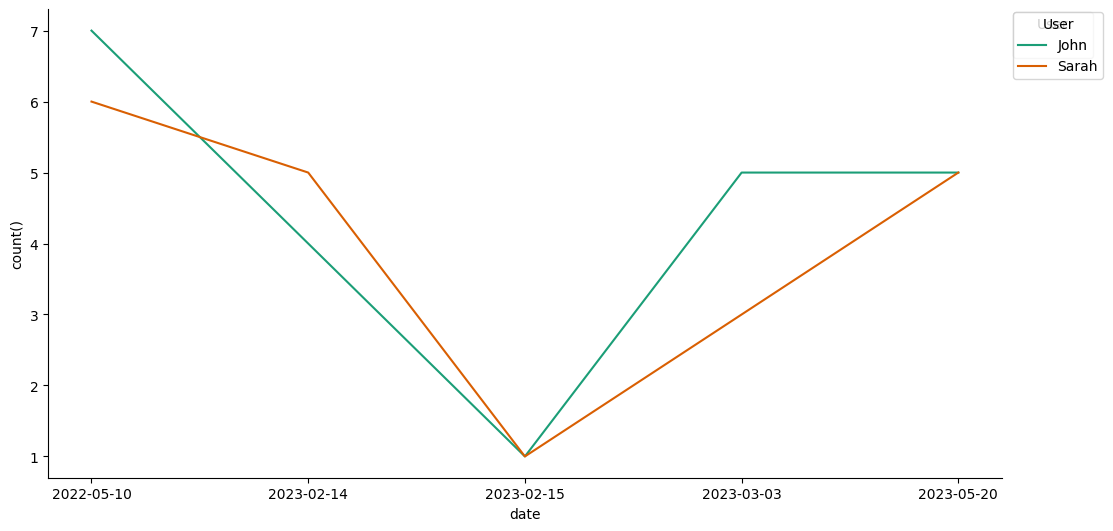

In [56]:
# @title Date vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('name')):
  _plot_series(series, series_name, i)
  fig.legend(title='User', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

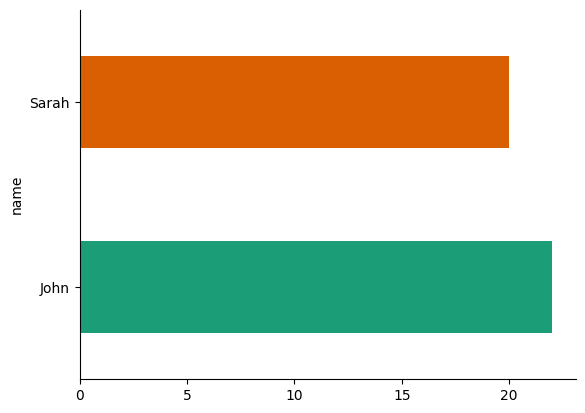

In [57]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

## Distribution of message over time

In [58]:
# Convert 'date' column to datetime
df['datetime'] = pd.to_datetime(df['date'], format='mixed')

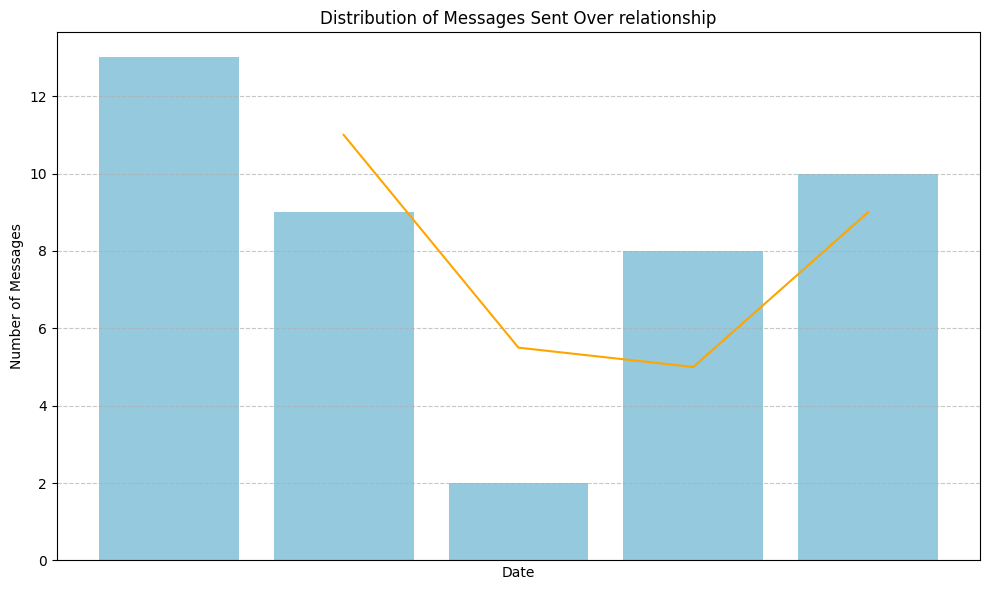

In [61]:
message_count = df.groupby('date').size()
moving_average_30d = message_count.rolling(window=2).mean()


plt.figure(figsize=(10, 6))
sns.barplot(x=message_count.index, y=message_count.values, color='skyblue')
plt.plot(moving_average_30d.index, moving_average_30d.values, color='orange', label='Moving Average (30-day)')
plt.title('Distribution of Messages Sent Over relationship')
plt.xlabel('Date')
plt.ylabel('Number of Messages')
plt.xticks([])  # Hide x-axis ticks
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Save 